# Tech Challenge Fase 2

# Aluno
Klauber Lage - RM358972

Link vídeo no Youtube: https://www.youtube.com/watch?v=m9NDA8SMadw&ab_channel=KlauberLage

Link repositório no GitHub: https://github.com/klauberfreitas/fiap/tree/main/Fase%201/Tech%20Challenge

# O PROBLEMA
O desafio consiste em projetar, implementar e testar um sistema que 
utilize Algoritmos Genéticos para otimizar uma função ou resolver um problema 
complexo de otimização. Você pode escolher problemas como otimização de 
rotas, alocação de recursos e design de redes neurais.

# Tarefas
REQUISITOS DO PROJETO

- Definição do Problema: escolha um problema real que possa ser 
resolvido por meio de otimização genética. Descreva o problema, os 
objetivos e os critérios de sucesso.

- Testes e Resultados: realize testes para demonstrar a eficácia do 
algoritmo. Compare os resultados obtidos com métodos de solução 
convencionais.

- Documentação: forneça uma documentação completa do projeto, 
incluindo descrição do problema, detalhes da implementação do 
algoritmo, análises de resultados e conclusões.


### Referência:
[Documento PDF do Desafio](POSTECH-TechChallenge-IADT-Fase1.pdf)

---



# Relatório 

Usarei a mesma estrutura do primeiro Tech Challenge, seguindo a ordem de resolução dos problemas de acordo com o pedido.

Escolhi a otimização de rotas por ser o que mais me interessou, já que talvez eu consiga aplicar isto de certa forma, em um cenário real no trabalho.

### O problema
Criar um algortimo de Caixeiro Viajante (PCV).

### Objetivos
Encontrar a rota mais curta a ser percorrida em um conjunto de cidades, nisto, é necessário que cada uma delas seja visitada uma única vez e retorne ao ponto de partida.

### Critérios de sucesso
Usarei o mesmo fluxo descrito na aula Princípios e conceitos fundamentais dos Algoritmos Genéticos como critérios de sucesso.

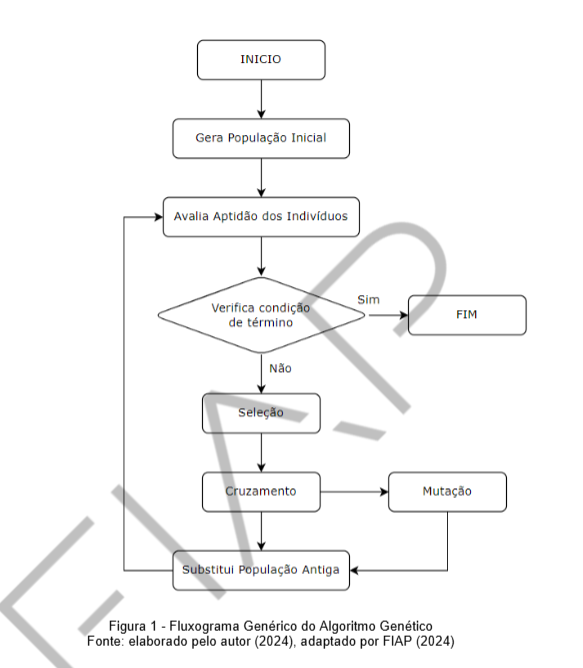

Também serão adicionadas as seguintes funcionalidades à lista:

- Armazenar o melhor indivíduo de geração para ser usado nas próximas gerações.
- O melhor indivíduo deve ser usado no próximo ciclo de execução.
- Adicionar mutação


# 0 - Instalação e importação de dependências

In [21]:
# ! pip install numpy random
# ! pip install pygame
# ! pip install python_tsp 
! pip install deap keras tensorflow

In [22]:
import pygame
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import json
import copy

from typing import List, Tuple
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Variáveis Globais
## Variáveis de estilo visual

c:\Users\kake\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\kake\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


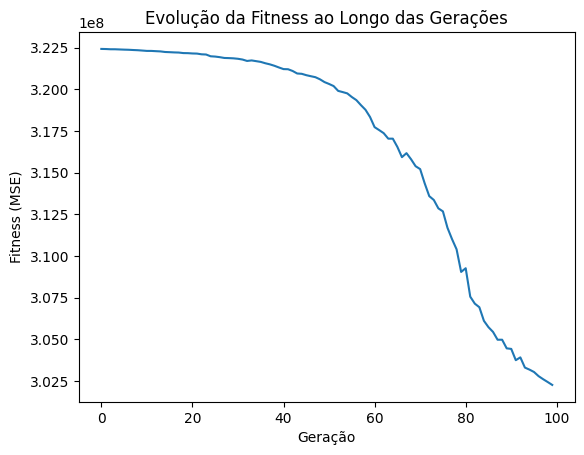

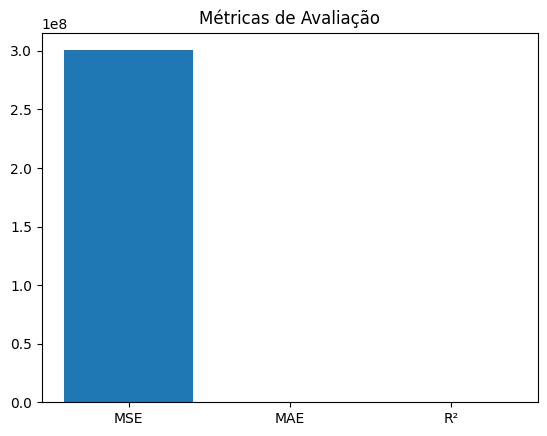

Mean Squared Error: 300396298.2037152
MAE: 12984.481237138094
R^2 Score: -0.9349356050592463


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from deap import base, creator, tools, algorithms

# Lendo os dados
dados = pd.read_csv('data/dados.csv')

# Transformando os dados categóricos
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dados_transformados = dados.copy()
dados_transformados['gênero'] = label_encoder.fit_transform(dados['gênero'])
dados_transformados['fumante'] = label_encoder.fit_transform(dados['fumante'])
dados_transformados['região'] = label_encoder.fit_transform(dados['região'])

# Separando as variáveis independentes e dependentes
x = dados_transformados.drop(columns=['encargos'], axis=1)
y = dados_transformados['encargos']

# Normalizando os dados
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Definindo a função de avaliação
def evalFitness(individual):
    # Coeficientes do modelo de regressão linear
    coef = np.array(individual)
    y_pred = np.dot(x_train, coef)
    mse = mean_squared_error(y_train, y_pred)
    return mse,

# Configurando o algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=x_train.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalFitness)

# Parâmetros do algoritmo genético
population = toolbox.population(n=100)
n_generations = 100
crossover_prob = 0.8
mutation_prob = 0.2

# Evolução
fitness_values = []
for gen in range(n_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    fitness_values.append(tools.selBest(population, 1)[0].fitness.values[0])

# Plotando a evolução das gerações
plt.plot(fitness_values)
plt.xlabel('Geração')
plt.ylabel('Fitness (MSE)')
plt.title('Evolução da Fitness ao Longo das Gerações')
plt.show()

# Avaliando o melhor indivíduo
best_individual = tools.selBest(population, 1)[0]
coef = np.array(best_individual)
y_pred = np.dot(x_test, coef)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotando as métricas de avaliação
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2}
plt.bar(metrics.keys(), metrics.values())
plt.title('Métricas de Avaliação')
plt.show()

print(f'Mean Squared Error: {mse}')
print('MAE:', mae)
print(f'R^2 Score: {r2}')